#**TASK - 01**

Sales Forecast - MSE: 1785171.3921138756
Sales Forecast - R-squared: 0.6987635571741984


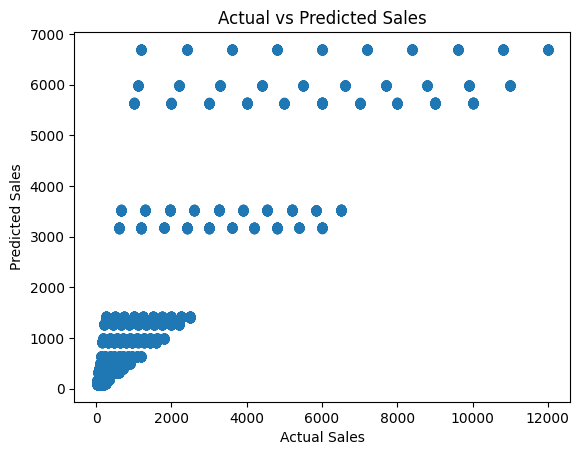

In [2]:
# Revised Script for Sales Forecasting

# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the dataset
# Ensure that 'retail_sales.csv' is in the same directory as this script.
data_sales = pd.read_csv("retail_sales.csv")

# Step 3: Preprocess and create the target variable 'sales'
# Here, we assume sales is calculated as unit_price * quantity
data_sales['sales'] = data_sales['unit_price'] * data_sales['quantity']

# Step 4: Select relevant features and target
# For this example, we'll use discount, shipping_cost, and unit_cost as features.
X_sales = data_sales[['discount', 'shipping_cost', 'unit_cost']]
y_sales = data_sales['sales']

# Step 5: Split the data into training and testing sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_sales, y_sales, test_size=0.2, random_state=42
)

# Step 6: Create and train the Linear Regression model
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Step 7: Make predictions on the test set
y_pred_sales = model_sales.predict(X_test_sales)

# Step 8: Evaluate the model using MSE and R-squared metrics
mse_sales = mean_squared_error(y_test_sales, y_pred_sales)
r2_sales = r2_score(y_test_sales, y_pred_sales)
print(f"Sales Forecast - MSE: {mse_sales}")
print(f"Sales Forecast - R-squared: {r2_sales}")

# Step 9: Visualize Actual vs Predicted Sales
plt.scatter(y_test_sales, y_pred_sales)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


#**TASK - 02**

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
# (The dataset is loaded from a URL. Alternatively, you can download it from Kaggle or Google.)
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t')
df.columns = ["label", "message"]

# Step 2: Convert labels to binary (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 3: Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []
for msg in df['message']:
    # Remove non-letter characters and lower the case
    msg = re.sub('[^a-zA-Z]', ' ', msg).lower().split()
    # Remove stopwords and apply stemming
    msg = [ps.stem(word) for word in msg if word not in stopwords.words('english')]
    corpus.append(" ".join(msg))

# Step 4: Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(corpus).toarray()
y = df['label'].values

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.9847533632286996
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.99      0.91      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



#**TASK - 03**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the dataset
df = pd.read_csv("https://sagemaker-sample-files.s3.amazonaws.com/datasets/tabular/synthetic/churn.csv")

# Step 3: Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Step 4: Define features and target variable
X = df.drop(columns=['Churn?'])
y = df['Churn?']

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.943
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       510
           1       0.93      0.96      0.94       490

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



#**TASK - 04**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")

# Step 2: Reduce dataset size for faster processing
df = df.sample(frac=0.1, random_state=42)

# Step 3: Define features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train SVM Model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9989468141126909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.00      0.00      0.00         6

    accuracy                           1.00      5697
   macro avg       0.50      0.50      0.50      5697
weighted avg       1.00      1.00      1.00      5697



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
